# Exploring Minority-related data in the AP and Carnegie Datasets

Sections load AP data and combine years then report some correlations of the AP outcomes on the national level ['msi','hbcu','hsi','tribal','womens']. Scatterplots and correlations of mean are included. Pacific Islander, 2+ Races, and No Response were excluded

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_loaders
sns.set_theme(context='paper',style='white', font='sans-serif', font_scale=3, color_codes=True)#, rc={'figure.figsize':(10.0,10.0)})

In [2]:
# Loading Data

carnegie=data_loaders.gimmeCarnegieLimited()
outcomes_2022=data_loaders.gimmeOutcomes(2022)
outcomes_2021=data_loaders.gimmeOutcomes(2021)
outcomes_2017=data_loaders.gimmeOutcomes(2017)
outcomes_2012=data_loaders.gimmeOutcomes(2012)
states_abbrv=pd.read_csv('data/State Abbreviation.csv')


In [3]:
# Aggregating Years

outcomes_2012['Year']=2012
outcomes_2017['Year']=2017
outcomes_2021['Year']=2021
outcomes_2022['Year']=2022
outcomes=pd.concat([outcomes_2012,outcomes_2017,outcomes_2021,outcomes_2022])
minorities_ap=['Overall', 'Asian', 'Hispanic/Latino', 'White',
       'Black or African American', 'Native American or Alaska Native',
       'Native Hawaiian or other Pacific Islander', 'Two or More Races',
       'No Response']

In [4]:
carnegie.keys()

Index(['name', 'city', 'stabbr', 'basic2021', 'enrprofile2021', 'sector',
       'control', 'hbcu', 'hsi', 'msi', 'womens', 'selindex', 'rooms',
       'ugtenr20', 'tribal'],
      dtype='object')

In [7]:
# Prepare Categorical Summation
carnegie_states_summed=[]
for state in states_abbrv['stabbr']:
    carnegie_states_summed.append([state,
    carnegie['msi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hbcu'].loc[carnegie['stabbr']==state].sum(),
    carnegie['hsi'].loc[carnegie['stabbr']==state].sum(),
    carnegie['tribal'].loc[carnegie['stabbr']==state].sum(),
    carnegie['womens'].loc[carnegie['stabbr']==state].sum()])
carnegie_states_summed=pd.DataFrame(carnegie_states_summed,columns=['stabbr','msi','hbcu','hsi','tribal','womens'])


In [8]:
outcomes_ap_carnegie=pd.merge(outcomes,carnegie_states_summed,on='stabbr')
outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)
outcomes_ap_carnegie=outcomes_ap_carnegie.dropna()
outcomes_ap_carnegie=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['Race']!='Two or More Races']
outcomes_ap_carnegie=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['Race']!= 'Native Hawaiian or other Pacific Islander']


C:\Users\shann\AppData\Local\Temp\ipykernel_21332\1043966200.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outcomes_ap_carnegie=outcomes_ap_carnegie.replace('**',np.nan)


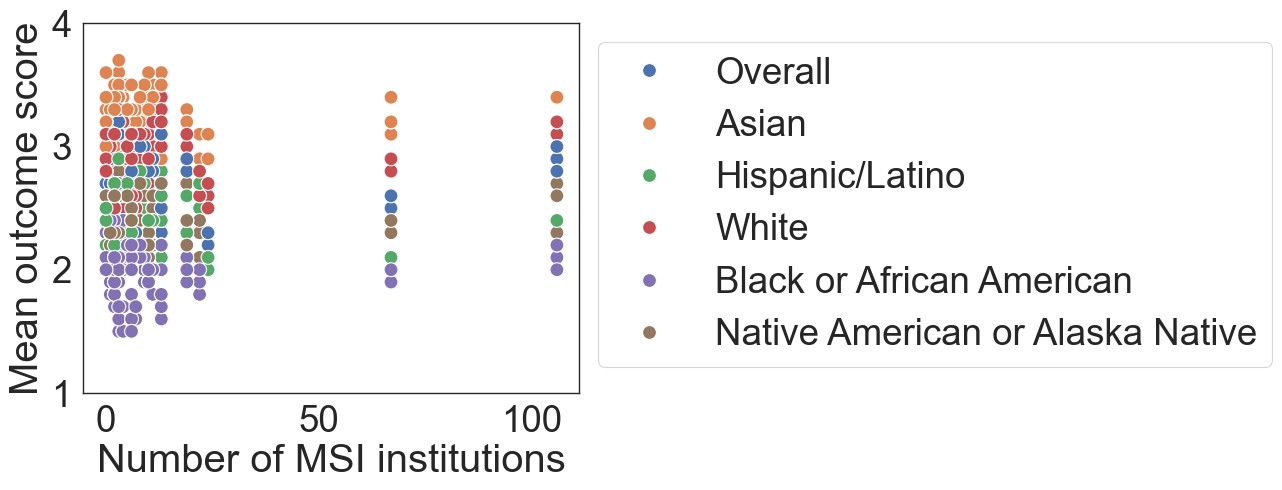

In [9]:
sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'],x='msi',y='Mean',hue='Race',s=100)
plt.ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Number of MSI institutions')
plt.ylabel('Mean outcome score')
plt.show()

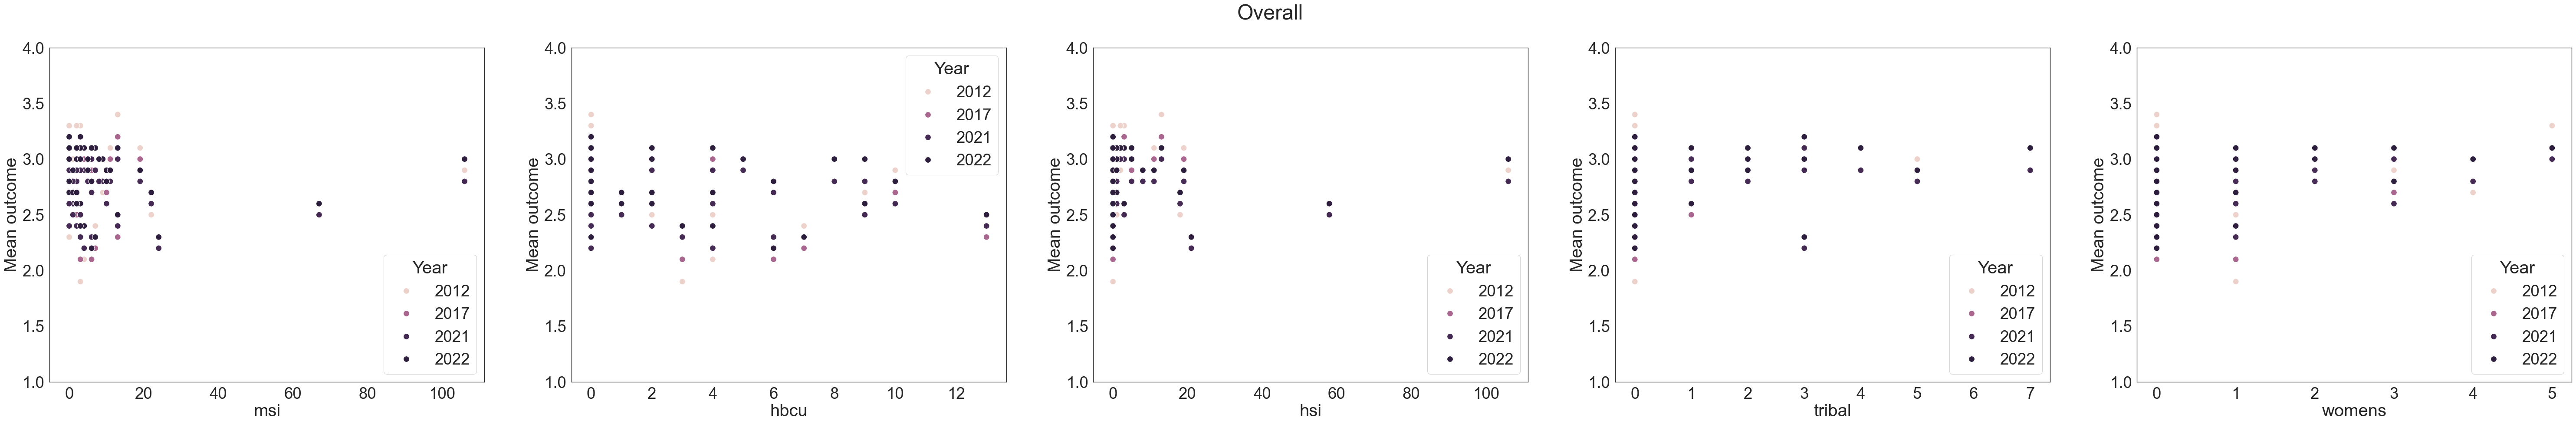

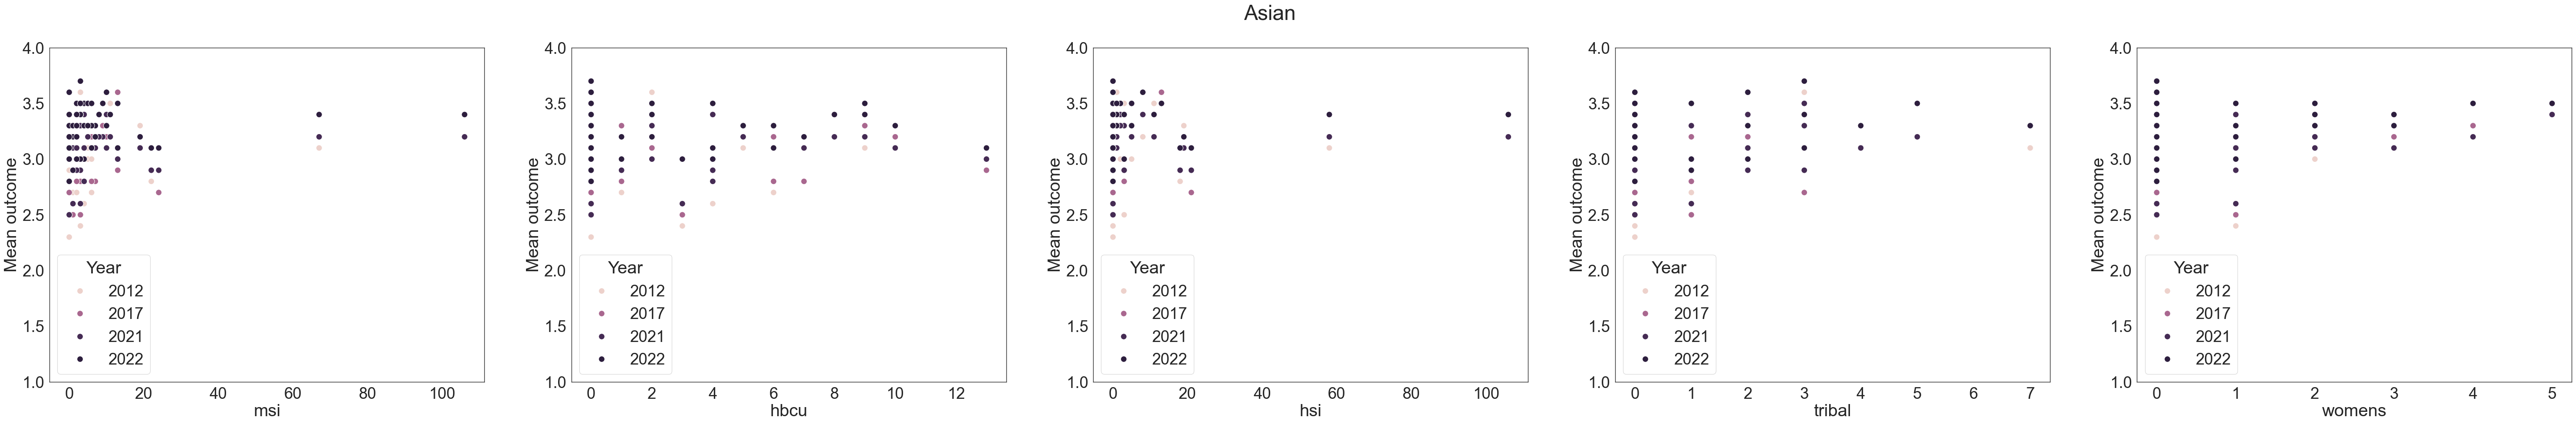

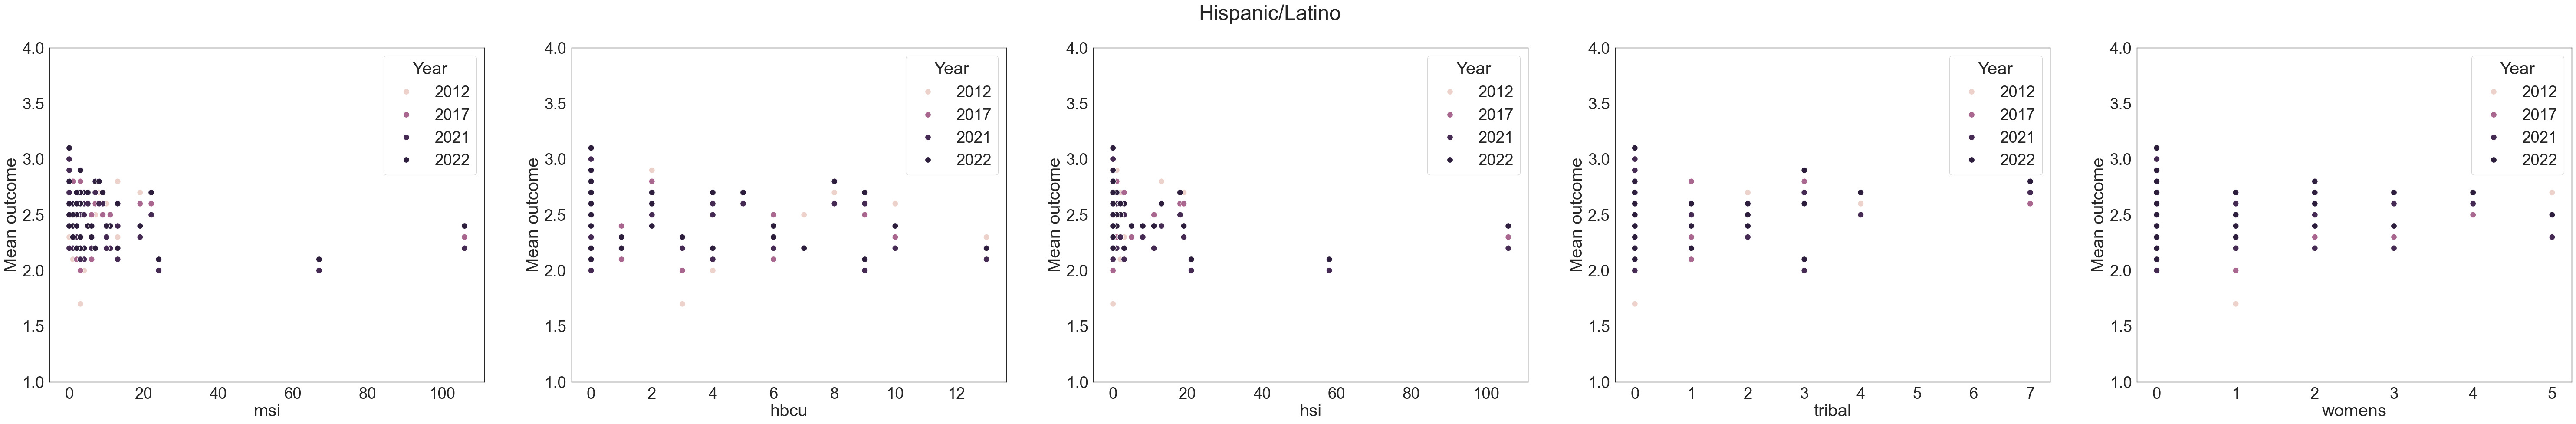

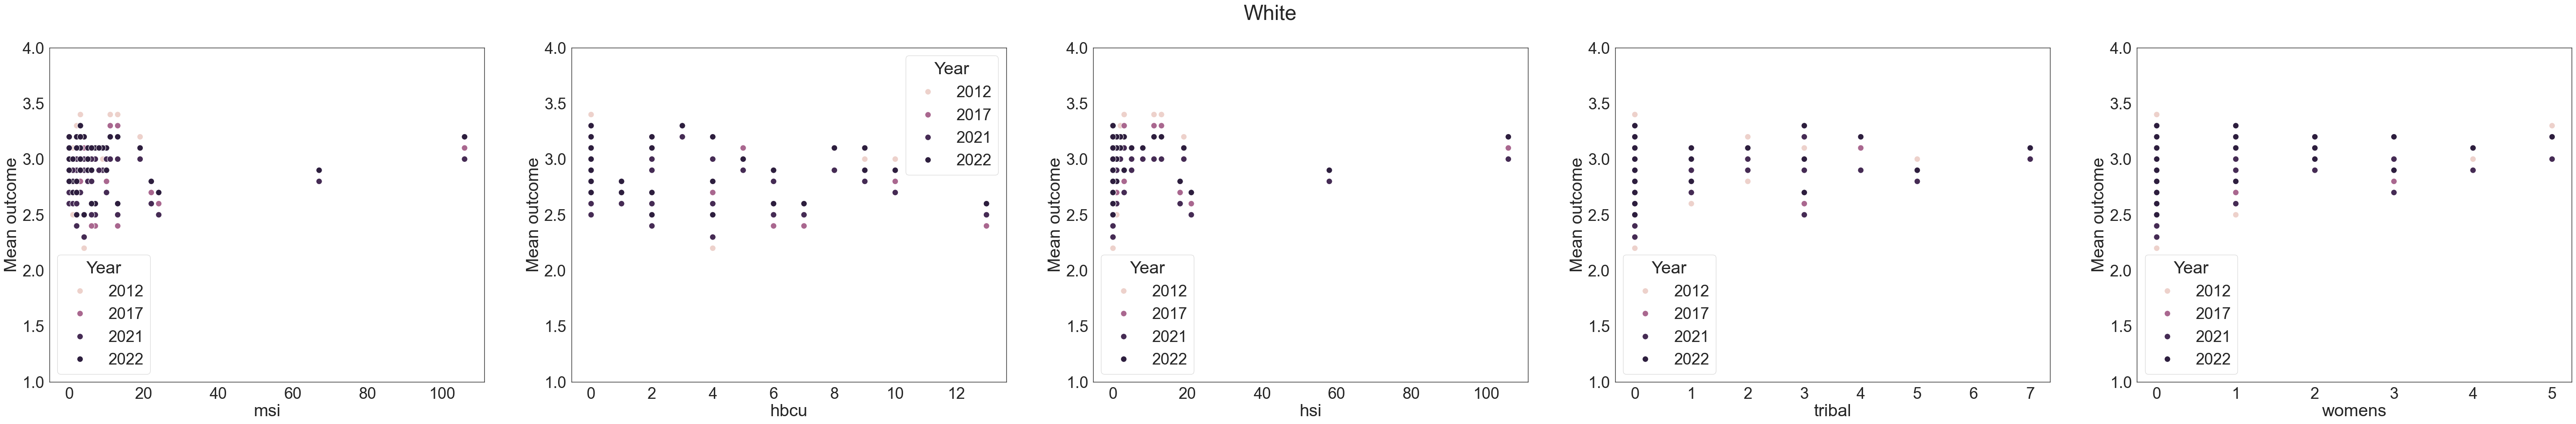

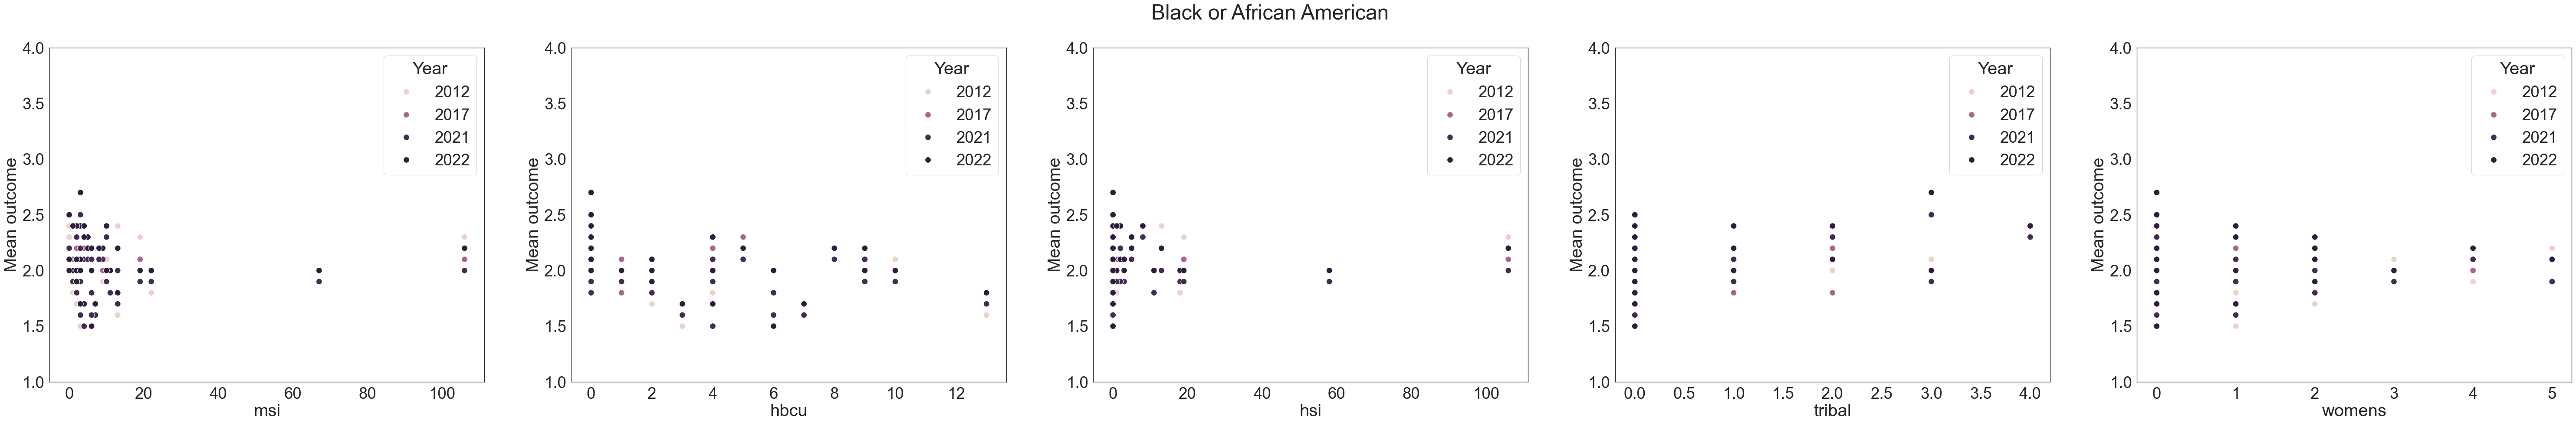

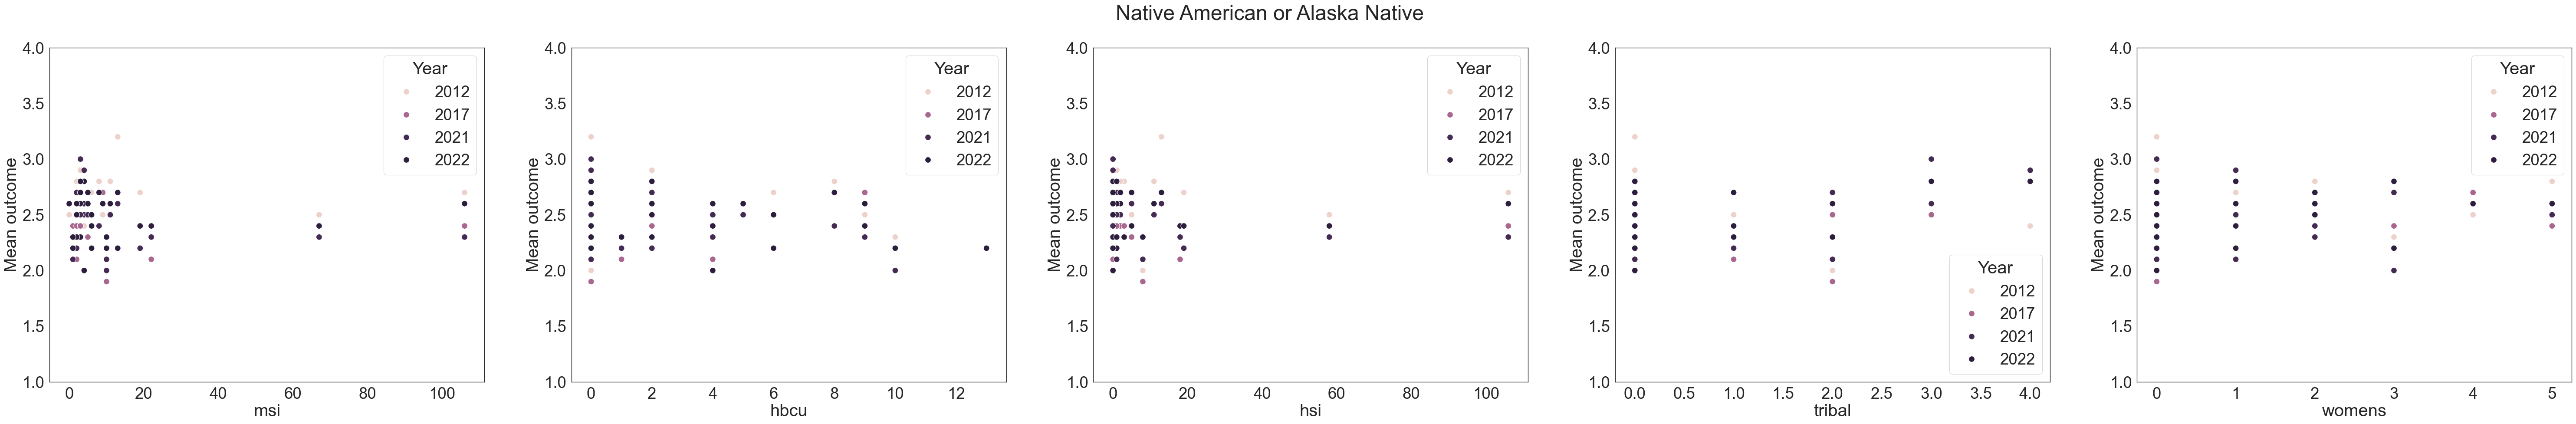

In [10]:
i=0

for race in minorities_ap:
    if race in ['Two or More Races','Native Hawaiian or other Pacific Islander','No Response']: continue
    j=0
    fig, axes=plt.subplots(1,len(carnegie_states_summed.keys())-1,figsize=(75,10))

    for category in carnegie_states_summed:
        if category=='stabbr': continue # skip state key
        sns.scatterplot(data=outcomes_ap_carnegie.loc[outcomes_ap_carnegie['State']!='National'].loc[outcomes_ap_carnegie['Race']==race],x=category,y='Mean',s=100,ax=axes[j],hue='Year')
        axes[j].set_ylim(int(outcomes_ap_carnegie['Mean'].min()),round(outcomes_ap_carnegie['Mean'].max()))
        # axes[j].set_xlim(-1,round(outcomes_ap_carnegie[category].max())+1)
        axes[j].set_xlabel(f'{category}')
        axes[j].set_ylabel('Mean outcome')
        j+=1
    fig.suptitle(f'{race}')
    i+=1
plt.show()
    # plt.legend(bbox_to_anchor=(1,1))

In [11]:
correlations={}
for race in minorities_ap:
    if race in ['Two or More Races','Native Hawaiian or other Pacific Islander','No Response']: continue
    corr_df=outcomes_ap_carnegie[['stabbr','Mean','msi', 'hbcu', 'hsi', 'tribal', 'womens']].loc[outcomes_ap_carnegie['Race']==race]
    corr_df.index=corr_df['stabbr']
    correlations[race]=corr_df[['Mean','msi','hbcu','hsi','tribal','womens','msi', 'hbcu', 'hsi', 'tribal', 'womens']].corr()['Mean']

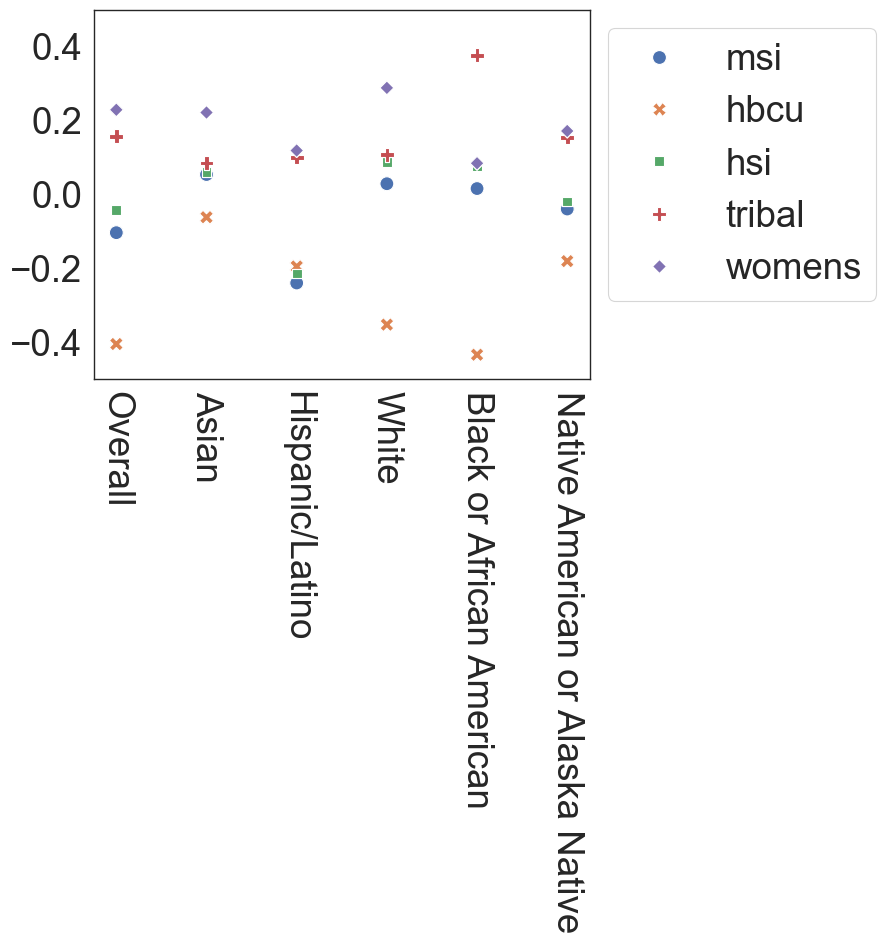

In [12]:
sns.scatterplot(data=pd.DataFrame(correlations).T.drop('Mean',axis=1),s=100)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=-90)
plt.ylim(-.5,.5)
plt.show()